# Import important dataset

In [6]:
# !pip install imbalanced-learn

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
%matplotlib inline
seed = 42
tf.random.set_seed(seed)

# Download MCS dataset

In [116]:
# !gdown --id 11_0c5fvFpydBb0-pWCDcxzp3-ZiUtKGX

In [117]:
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')
df

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397,1
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397,1
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015,1
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015,1


# Split the dataset into training dataset (80%) and test dataset (20%)

In [118]:
from sklearn.model_selection import train_test_split

y = df['Ligitimacy']
X = df.drop(['Ligitimacy'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed, stratify=y)
X_test.shape

(2897, 12)

# Implement classic classifiers (Adaboost and RF)

In [119]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

adaBoostClassifier = AdaBoostClassifier()
randomForestClassifier = RandomForestClassifier()

# Train Adaboost and RF via training dataset


In [120]:
## fit models on training data
adaBoostClassifier.fit(X_train,y_train)
randomForestClassifier.fit(X_train,y_train)

y_adaBoost = adaBoostClassifier.predict(X_train)
y_randomForest = randomForestClassifier.predict(X_train)
AdaBoost_Training_Accuracy= accuracy_score(y_adaBoost, y_train)
Random_Forest_Traing_Accuracy= accuracy_score(y_randomForest , y_train)

print('AdaBoost Traing Accuracy:', AdaBoost_Training_Accuracy)
print('Random Forest Traing Accuracy:', Random_Forest_Traing_Accuracy)

AdaBoost Traing Accuracy: 0.9513247605074653
Random Forest Traing Accuracy: 1.0


# Verify detection performance using test dataset and present results comparison in bar chart


In [121]:
y_pred_adaBoost = adaBoostClassifier.predict(X_test)
y_pred_randomForest = randomForestClassifier.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix

AdaBoost_Testing_Accuracy = accuracy_score(y_pred_adaBoost, y_test)
Random_Forest_Testing_Accuracy = accuracy_score(y_pred_randomForest, y_test)

print('AdaBoost Testing Accuracy:', AdaBoost_Testing_Accuracy)
print('Random Forest Testing Accuracy:', Random_Forest_Testing_Accuracy)

AdaBoost Testing Accuracy: 0.9423541594753193
Random Forest Testing Accuracy: 0.9965481532619952


## Confusion matrix

C:\Users\Kirolos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Kirolos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Random Forest  Confusion Matrix ')

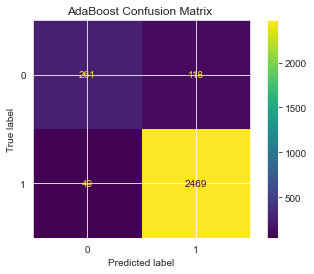

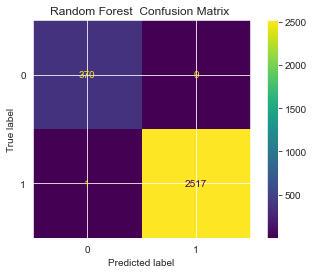

In [122]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

print(plot_confusion_matrix(adaBoostClassifier, X_test, y_test))
plt.title("AdaBoost Confusion Matrix ")
print(plot_confusion_matrix(randomForestClassifier, X_test, y_test))
plt.title("Random Forest  Confusion Matrix ")

In [123]:
AdaBoost_Testing_Accuracy = accuracy_score(y_pred_adaBoost , y_test)
Random_Forest_Testing_Accuracy =accuracy_score(y_pred_randomForest , y_test)
acc_dict = {'AdaBoost_Testing_Accuracy':AdaBoost_Testing_Accuracy,
            'Random_Forest_Testing_Accuracy':Random_Forest_Testing_Accuracy}
acc_dict

{'AdaBoost_Testing_Accuracy': 0.9423541594753193,
 'Random_Forest_Testing_Accuracy': 0.9965481532619952}

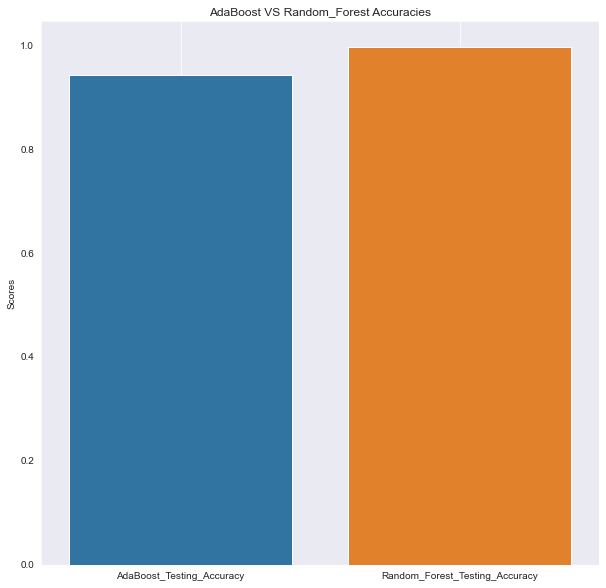

In [124]:
sorted_acc_tup = sorted(acc_dict.items(),key=lambda item:item[1])
acc_dict = {k:v for k,v in sorted_acc_tup}
plt.rcParams["figure.figsize"] = (10,10)

sns.barplot(x = list(acc_dict.keys()), y=list(acc_dict.values()))
plt.grid()
plt.ylabel('Scores');
plt.title('AdaBoost VS Random_Forest Accuracies');

# Implement Conditional GAN with Wasserstein loss

### For good generation we should make the dataset balanced, so our generator can recognise the features of ligitimat tasks and unligitimat tasks

In [125]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=seed)
X_train_smoted, y_train_smoted = smote.fit_resample(X_train, y_train)

### Data scaling

In [126]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train_smoted_scaled = scaler.fit_transform(X_train_smoted)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_smoted_scaled

array([[0.99249812, 0.24691239, 0.19038729, ..., 0.8       , 0.        ,
        0.24385902],
       [0.50187547, 0.8656828 , 0.48180773, ..., 0.07142857, 0.        ,
        0.85362741],
       [0.36184046, 0.76124423, 0.83948626, ..., 0.32857143, 0.        ,
        0.7560968 ],
       ...,
       [0.28982246, 0.53945756, 0.47422468, ..., 0.65714286, 0.        ,
        0.53656001],
       [0.75743936, 0.67476991, 0.16140315, ..., 0.67142857, 0.        ,
        0.68287282],
       [0.03325831, 0.68059008, 0.16064208, ..., 0.04285714, 0.        ,
        0.68287282]])

### Constants and hyperparameters

In [142]:
batch_size = 1024
num_classes = 2
take_size = 12
latent_dim = 126

In [143]:
from tensorflow import keras
from keras import layers
task_shape = (take_size + num_classes, 1)
X_train_smoted = X_train_smoted.astype(np.float32)
X_train_smoted_scaled = X_train_smoted_scaled.astype(np.float32)
all_labels = keras.utils.to_categorical(y_train_smoted, 2)
# Create tf.data.Dataset.
dataset = tf.data.Dataset.from_tensor_slices((X_train_smoted_scaled, all_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 12), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [144]:
def conv_block(
    x,
    filters,
    activation,
    kernel_size=2,
    strides=1,
    padding="same",
    use_bias=True,
    use_bn=False,
    use_dropout=False,
    drop_value=0.5,
):
    x = layers.Conv1D(
        filters, kernel_size, strides=strides, padding=padding, use_bias=use_bias
    )(x)
    if use_bn:
        x = layers.BatchNormalization()(x)
    x = activation(x)
    if use_dropout:
        x = layers.Dropout(drop_value)(x)
    return x


def get_discriminator_model():
    img_input = layers.Input(shape=task_shape)
    # Zero pad the input to make the input images size to (32, 32, 1).
    # x = layers.ZeroPadding2D((2, 2))(img_input)
    x = conv_block(
        img_input,
        64,
        kernel_size=3,
        strides=2,
        use_bn=False,
        use_bias=True,
        activation=layers.LeakyReLU(0.2),
        use_dropout=False,
        drop_value=0.3,
    )
    x = conv_block(
        x,
        128,
        kernel_size=3,
        strides=2,
        use_bn=False,
        activation=layers.LeakyReLU(0.2),
        use_bias=True,
        use_dropout=True,
        drop_value=0.3,
    )
    x = conv_block(
        x,
        256,
        kernel_size=2,
        strides=2,
        use_bn=False,
        activation=layers.LeakyReLU(0.2),
        use_bias=True,
        use_dropout=True,
        drop_value=0.3,
    )
    x = conv_block(
        x,
        512,
        kernel_size=3,
        strides=2,
        use_bn=False,
        activation=layers.LeakyReLU(0.2),
        use_bias=True,
        use_dropout=False,
        drop_value=0.3,
    )

    x = layers.Flatten()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(1)(x)

    d_model = keras.models.Model(img_input, x, name="discriminator")
    return d_model

d_model = get_discriminator_model()
d_model.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 14, 1)]           0         
                                                                 
 conv1d_12 (Conv1D)          (None, 7, 64)             256       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 7, 64)             0         
                                                                 
 conv1d_13 (Conv1D)          (None, 4, 128)            24704     
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 4, 128)            0         
                                                                 
 dropout_12 (Dropout)        (None, 4, 128)            0         
                                                                 
 conv1d_14 (Conv1D)          (None, 2, 256)          

## Create the generator

In [145]:

def block(
    x,
    filters,
    activation,
    kernel_size=3,
    strides=1,
    padding="same",
    use_bn=False,
    use_bias=True,
    use_dropout=False,
    drop_value=0.3,
):
    # x = layers.UpSampling2D(up_size)(x)
    x = layers.Conv1D(
        filters, kernel_size, strides=strides, padding=padding, use_bias=use_bias
    )(x)

    if use_bn:
        x = layers.BatchNormalization()(x)

    if activation:
        x = activation(x)
    if use_dropout:
        x = layers.Dropout(drop_value)(x)
    return x


def get_generator_model():
    noise = layers.Input(shape=(latent_dim+num_classes,))
    x = layers.Dense(4 * 4 * 256, use_bias=False,activation='relu')(noise)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dense(256, use_bias=False,activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(take_size,activation='leaky_relu')(x)
    g_model = keras.models.Model(noise, x, name="generator")
    return g_model


g_model = get_generator_model()
g_model.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense_13 (Dense)            (None, 4096)              524288    
                                                                 
 batch_normalization_6 (Batc  (None, 4096)             16384     
 hNormalization)                                                 
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 4096)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               1048576   
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                         

## Create the WGAN-GP model

In [146]:

class WGAN(keras.Model):
    def __init__(
        self,
        discriminator,
        generator,
        latent_dim,
        discriminator_extra_steps=3,
        gp_weight=10.0,
    ):
        super(WGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_steps = discriminator_extra_steps
        self.gp_weight = gp_weight

    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super(WGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    def gradient_penalty(self, batch_size, real_images, fake_images):
        """Calculates the gradient penalty.

        This loss is calculated on an interpolated image
        and added to the discriminator loss.
        """
        # Get the interpolated image
        alpha = tf.random.normal([batch_size,1], 0.0, 1.0)
        diff = fake_images - real_images
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 1. Get the discriminator output for this interpolated image.
            pred = self.discriminator(interpolated, training=True)

        # 2. Calculate the gradients w.r.t to this interpolated image.
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 3. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1]))
        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def train_step(self, data):
        real_task,one_hot_labeld=data
        if isinstance(real_task, tuple):
            real_task = real_task[0]

        # Get the batch size
        real_task=tf.concat([real_task,one_hot_labeld],axis=1)
        batch_size = tf.shape(real_task)[0]
        for i in range(self.d_steps):
            # Get the latent vector
            random_latent_vectors = tf.random.normal(
                shape=(batch_size, self.latent_dim)
            )
            random_latent_vectors=tf.concat([random_latent_vectors,one_hot_labeld],axis=1)

            with tf.GradientTape() as tape:
                # Generate fake images from the latent vector
                fake_task = self.generator(random_latent_vectors, training=True)
                # Get the logits for the fake images
                fake_task=tf.concat([fake_task,one_hot_labeld],axis=1)
                fake_logits = self.discriminator(fake_task, training=True)
                # Get the logits for the real images
                real_logits = self.discriminator(real_task, training=True)

                # Calculate the discriminator loss using the fake and real image logits
                d_cost = self.d_loss_fn(real_img=real_logits, fake_img=fake_logits)
                # Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, real_task, fake_task)
                # Add the gradient penalty to the original discriminator loss
                d_loss = d_cost + gp * self.gp_weight

            # Get the gradients w.r.t the discriminator loss
            d_gradient = tape.gradient(d_loss, self.discriminator.trainable_variables)
            # Update the weights of the discriminator using the discriminator optimizer
            self.d_optimizer.apply_gradients(
                zip(d_gradient, self.discriminator.trainable_variables)
            )

        # Train the generator
        # Get the latent vector
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_latent_vectors=tf.concat([random_latent_vectors,one_hot_labeld],axis=1)
        with tf.GradientTape() as tape:
            # Generate fake images using the generator
            generated_task = self.generator(random_latent_vectors, training=True)
            generated_task=tf.concat([generated_task,one_hot_labeld],axis=1)
            # Get the discriminator logits for fake images
            gen_img_logits = self.discriminator(generated_task, training=True)
            # Calculate the generator loss
            g_loss = self.g_loss_fn(gen_img_logits)

        # Get the gradients w.r.t the generator loss
        gen_gradient = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update the weights of the generator using the generator optimizer
        self.g_optimizer.apply_gradients(
            zip(gen_gradient, self.generator.trainable_variables)
        )
        return {"d_loss": d_loss, "g_loss": g_loss}


# Apply the provided training dataset to CGAN

## Train the end-to-end model

In [147]:
# Instantiate the optimizer for both networks
# (learning_rate=0.0002, beta_1=0.5 are recommended)
generator_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)
discriminator_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)

# Define the loss functions for the discriminator,
# which should be (fake_loss - real_loss).
# We will add the gradient penalty later to this loss function.
def discriminator_loss(real_img, fake_img):
    real_loss = tf.reduce_mean(real_img)
    fake_loss = tf.reduce_mean(fake_img)
    return fake_loss - real_loss


# Define the loss functions for the generator.
def generator_loss(fake_img):
    return -tf.reduce_mean(fake_img)


# Set the number of epochs for trainining.
epochs = 50

# Get the wgan model
wgan = WGAN(
    discriminator=d_model,
    generator=g_model,
    latent_dim=latent_dim,
    discriminator_extra_steps=3,
)

# Compile the wgan model
wgan.compile(
    d_optimizer=discriminator_optimizer,
    g_optimizer=generator_optimizer,
    g_loss_fn=generator_loss,
    d_loss_fn=discriminator_loss,
)

# Start training
wgan.fit(dataset, batch_size=batch_size, epochs=epochs,
         )

Epoch 1/50
20/20 [==============================] - 31s 1s/step - d_loss: 1.0306 - g_loss: 0.7373
Epoch 2/50
20/20 [==============================] - 27s 1s/step - d_loss: -1.2707 - g_loss: 1.8086
Epoch 3/50
20/20 [==============================] - 25s 1s/step - d_loss: -1.2503 - g_loss: 1.7241
Epoch 4/50
20/20 [==============================] - 25s 1s/step - d_loss: -1.2518 - g_loss: 1.9139
Epoch 5/50
20/20 [==============================] - 25s 1s/step - d_loss: -1.2199 - g_loss: 2.0340
Epoch 6/50
20/20 [==============================] - 25s 1s/step - d_loss: -1.1819 - g_loss: 2.1434
Epoch 7/50
20/20 [==============================] - 25s 1s/step - d_loss: -1.1429 - g_loss: 2.1059
Epoch 8/50
20/20 [==============================] - 25s 1s/step - d_loss: -1.1054 - g_loss: 2.0650
Epoch 9/50
20/20 [==============================] - 25s 1s/step - d_loss: -1.0587 - g_loss: 1.9888
Epoch 10/50
20/20 [==============================] - 25s 1s/step - d_loss: -1.0113 - g_loss: 1.9126
Epoch 11/5

# Generate synthetic fake tasks via Generator network in CGAN after the training procedure

### To faul the model we will generate unligitimate(milicious) tasks and label them as 0

In [160]:
num_of_tasks=2000
trained_gen = wgan.generator
one_hot_example = keras.utils.to_categorical([0]*num_of_tasks, 2)
# Sample noise for the interpolation.
fake_noise = tf.random.normal(shape=(num_of_tasks, latent_dim))
# Combine the noise and the labels and run inference with the generator.
noise_and_labels = tf.concat([fake_noise, one_hot_example], 1)
fake = trained_gen.predict(noise_and_labels)

63/63 [==============================] - 0s 4ms/step


In [161]:
fake.shape

(2000, 12)

In [162]:
fake_inverse=scaler.inverse_transform(fake)
fake_tasks_df=pd.DataFrame(fake_inverse,columns=df.columns[:-1])
fake_tasks_df

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,3013.472656,45.472393,-75.203934,2.870436,10.935410,10.881277,51.760231,42.268013,7.538090,53.774006,-0.013827,252629.093750
1,1514.831299,45.480968,-75.232590,1.057343,13.605604,29.504301,47.348515,42.168087,7.424839,59.841034,0.523665,203812.531250
2,1936.185425,45.553188,-75.244804,2.931365,11.824066,18.896584,49.883713,30.475977,7.584974,57.915310,-0.073288,261422.421875
3,637.891479,45.509197,-75.255020,2.953881,13.588033,10.694720,44.778416,39.203648,7.375323,40.351543,1.331057,233566.953125
4,2316.576904,45.502987,-75.251091,2.329114,11.809584,15.008934,48.977791,34.718037,5.329229,59.522263,-0.009828,209836.125000
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1584.148438,45.456936,-75.274055,2.278354,14.567842,15.549793,42.991623,23.734514,5.807235,51.328136,0.255321,154048.921875
1996,2196.732178,45.482075,-75.240044,2.317201,11.519961,19.457003,48.815395,41.061378,5.238188,57.359741,0.162162,240674.828125
1997,2915.278320,45.465050,-75.220856,3.776816,11.627173,17.813435,50.668060,37.507996,7.839029,63.592953,-0.026696,216918.046875
1998,1483.401489,45.448112,-75.232391,1.355263,16.715073,-0.437701,39.935268,16.746204,2.443847,39.611137,-0.124302,203515.890625


In [163]:
fake_tasks_df.to_csv('Generated_fake_milicious_tasks.csv',index=False)

### Test the goodness of our generation

In [164]:
mm = adaBoostClassifier.predict(fake_tasks_df)
pd.DataFrame(mm).value_counts()

1    1760
0     240
dtype: int64

### Here the model is wrong in 1760 and right in only 240 example and this is a good evidence that we succeeded in scammimg the model because all this tasks should be calssified as unligitmate

# Mix the generated fake tasks with the original test dataset to obtain a new test dataset

### Mixing step

In [165]:
mixed_test_dataset=pd.concat([X_test,fake_tasks_df])
mixed_test_dataset

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
3779,1031.000000,45.556369,-75.201917,3.000000,11.000000,9.000000,40.000000,20.000000,1.000000,86.000000,0.000000,319073.000000
755,209.000000,45.469987,-75.155623,4.000000,16.000000,8.000000,60.000000,10.000000,8.000000,53.000000,0.000000,178319.000000
13131,3653.000000,45.536579,-75.161880,5.000000,8.000000,35.000000,50.000000,30.000000,8.000000,63.000000,1.000000,290926.000000
344,94.000000,45.392164,-75.235236,4.000000,4.000000,36.000000,40.000000,30.000000,6.000000,74.000000,0.000000,37549.000000
4672,1283.000000,45.496407,-75.183561,4.000000,4.000000,1.000000,50.000000,30.000000,5.000000,60.000000,0.000000,215851.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1584.148438,45.456936,-75.274055,2.278354,14.567842,15.549793,42.991623,23.734514,5.807235,51.328136,0.255321,154048.921875
1996,2196.732178,45.482075,-75.240044,2.317201,11.519961,19.457003,48.815395,41.061378,5.238188,57.359741,0.162162,240674.828125
1997,2915.278320,45.465050,-75.220856,3.776816,11.627173,17.813435,50.668060,37.507996,7.839029,63.592953,-0.026696,216918.046875
1998,1483.401489,45.448112,-75.232391,1.355263,16.715073,-0.437701,39.935268,16.746204,2.443847,39.611137,-0.124302,203515.890625


### We should label all these tasks as unligitimate tasks

In [166]:
y_for_fake_tasks=pd.DataFrame({'Ligitimacy':[0]*2000},)
# y_for_fake_tasks
mixed_y_test=pd.concat([y_test,y_for_fake_tasks['Ligitimacy']])
mixed_y_test

3779     1
755      0
13131    0
344      1
4672     1
        ..
1995     0
1996     0
1997     0
1998     0
1999     0
Name: Ligitimacy, Length: 4897, dtype: int64

# Obtain Adaboost and RF detection performance using the new test dataset and present results in bar chart

AdaBoostClassifier accuracy for the mixed data= 0.6064937716969573
RandomForestClassifier accuracy for the mixed data = 0.5934245456401879


<AxesSubplot:>

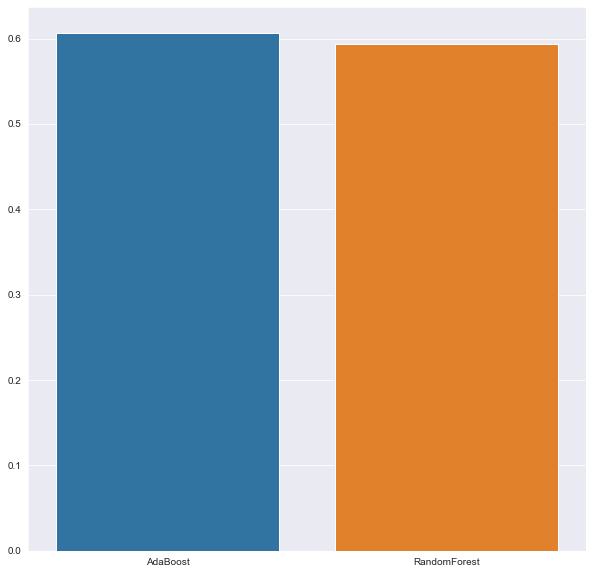

In [167]:
adaboost_accuracy=adaBoostClassifier.score(mixed_test_dataset,mixed_y_test)
rf_accuracy=randomForestClassifier.score(mixed_test_dataset,mixed_y_test)
print(f'AdaBoostClassifier accuracy for the mixed data= {adaboost_accuracy}')
print(f'RandomForestClassifier accuracy for the mixed data = {rf_accuracy}')
plt.figure(figsize=(10,10))
sns.barplot(x=['AdaBoost','RandomForest'],y=[adaboost_accuracy,rf_accuracy],)

### We can notice that in Adaboost the accuracy has been decreased from 0.94 to 0.60 .
### and in Random forest the accuracy has been decreased from 0.99 to 0.59.
## So, our generation is good and scammed the models

# Consider the Discriminator to as the first level classifier and RF/Adaboost as the second level classifier

### Because of our discriminator is trained on scaled data, so we will scale this data

In [168]:
mixed_test_dataset_scaled=scaler.transform(mixed_test_dataset)
mixed_test_dataset_scaled

array([[ 0.25756439,  0.87078121,  0.53914657, ...,  0.8       ,
         0.        ,  0.85363261],
       [ 0.052013  ,  0.4764824 ,  0.72794642, ...,  0.32857143,
         0.        ,  0.4878012 ],
       [ 0.91322831,  0.78044984,  0.70242734, ...,  0.47142857,
         1.        ,  0.7804762 ],
       ...,
       [ 0.72875177,  0.45394682,  0.46190717, ...,  0.47989932,
        -0.02669582,  0.58812335],
       [ 0.37069305,  0.37663538,  0.41486147, ...,  0.13730196,
        -0.12430178,  0.55329003],
       [ 0.47329716,  0.4897643 ,  0.60431999, ...,  0.32724212,
         0.25948471,  0.76374014]])

### Concat the labels as one hot encoding

In [169]:
one_hot_examples_for_mixed_dataset = keras.utils.to_categorical(mixed_y_test, 2)
mixed_test_dataset_scaled_and_labels = tf.concat([mixed_test_dataset_scaled, one_hot_examples_for_mixed_dataset], 1)
mixed_test_dataset_scaled_and_labels

<tf.Tensor: shape=(4897, 14), dtype=float64, numpy=
array([[0.25756439, 0.87078121, 0.53914657, ..., 0.85363261, 0.        ,
        1.        ],
       [0.052013  , 0.4764824 , 0.72794642, ..., 0.4878012 , 1.        ,
        0.        ],
       [0.91322831, 0.78044984, 0.70242734, ..., 0.7804762 , 1.        ,
        0.        ],
       ...,
       [0.72875177, 0.45394682, 0.46190717, ..., 0.58812335, 1.        ,
        0.        ],
       [0.37069305, 0.37663538, 0.41486147, ..., 0.55329003, 1.        ,
        0.        ],
       [0.47329716, 0.4897643 , 0.60431999, ..., 0.76374014, 1.        ,
        0.        ]])>

### Detect the real and fake tasks using the discriminator as first level classification

In [170]:
trained_critic=wgan.discriminator

In [171]:
ligitimate_tasks=df[df['Ligitimacy']==1]
ligitimate_tasks_without_labels=ligitimate_tasks.drop('Ligitimacy',axis=1)
ligitimate_tasks_without_labels=scaler.transform(ligitimate_tasks_without_labels)
ligitimate_tasks_without_labels=tf.concat([ligitimate_tasks_without_labels,keras.utils.to_categorical([1]*ligitimate_tasks_without_labels.shape[0], 2)],axis=1)
ligitimate_tasks_without_labels=pd.DataFrame(ligitimate_tasks_without_labels)
ligitimate_tasks_pred=pd.DataFrame(trained_critic.predict(ligitimate_tasks_without_labels))
ligitimate_tasks_pred.describe()

394/394 [==============================] - 1s 3ms/step


,0
count,12587.000000
mean,-0.915395
std,0.187839
min,-1.596453
25%,-1.040667
50%,-0.911122
75%,-0.786402
max,-0.337110


In [172]:
ligitimate_tasks=df[df['Ligitimacy']==0]
ligitimate_tasks_without_labels=ligitimate_tasks.drop('Ligitimacy',axis=1)
ligitimate_tasks_without_labels=scaler.transform(ligitimate_tasks_without_labels)
ligitimate_tasks_without_labels=tf.concat([ligitimate_tasks_without_labels,keras.utils.to_categorical([0]*ligitimate_tasks_without_labels.shape[0], 2)],axis=1)
ligitimate_tasks_without_labels=pd.DataFrame(ligitimate_tasks_without_labels)
ligitimate_tasks_pred=pd.DataFrame(trained_critic.predict(ligitimate_tasks_without_labels))
ligitimate_tasks_pred.describe()

60/60 [==============================] - 0s 3ms/step


,0
count,1897.000000
mean,-0.628636
std,0.204406
min,-1.232015
25%,-0.778623
50%,-0.646811
75%,-0.444343
max,-0.203142
